In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
taxi=pd.read_csv('C:/Users/Bharat Sakarwal/Downloads/UpGrad/NYCTaxiFares.csv')


In [68]:
taxi.head(5)

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Month,Day,Year,time,Hour
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,4,19,2010,08:17:56,8
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,4,17,2010,15:43:53,15
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,4,17,2010,11:23:26,11
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,4,11,2010,21:25:03,21
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,4,17,2010,02:19:01,2


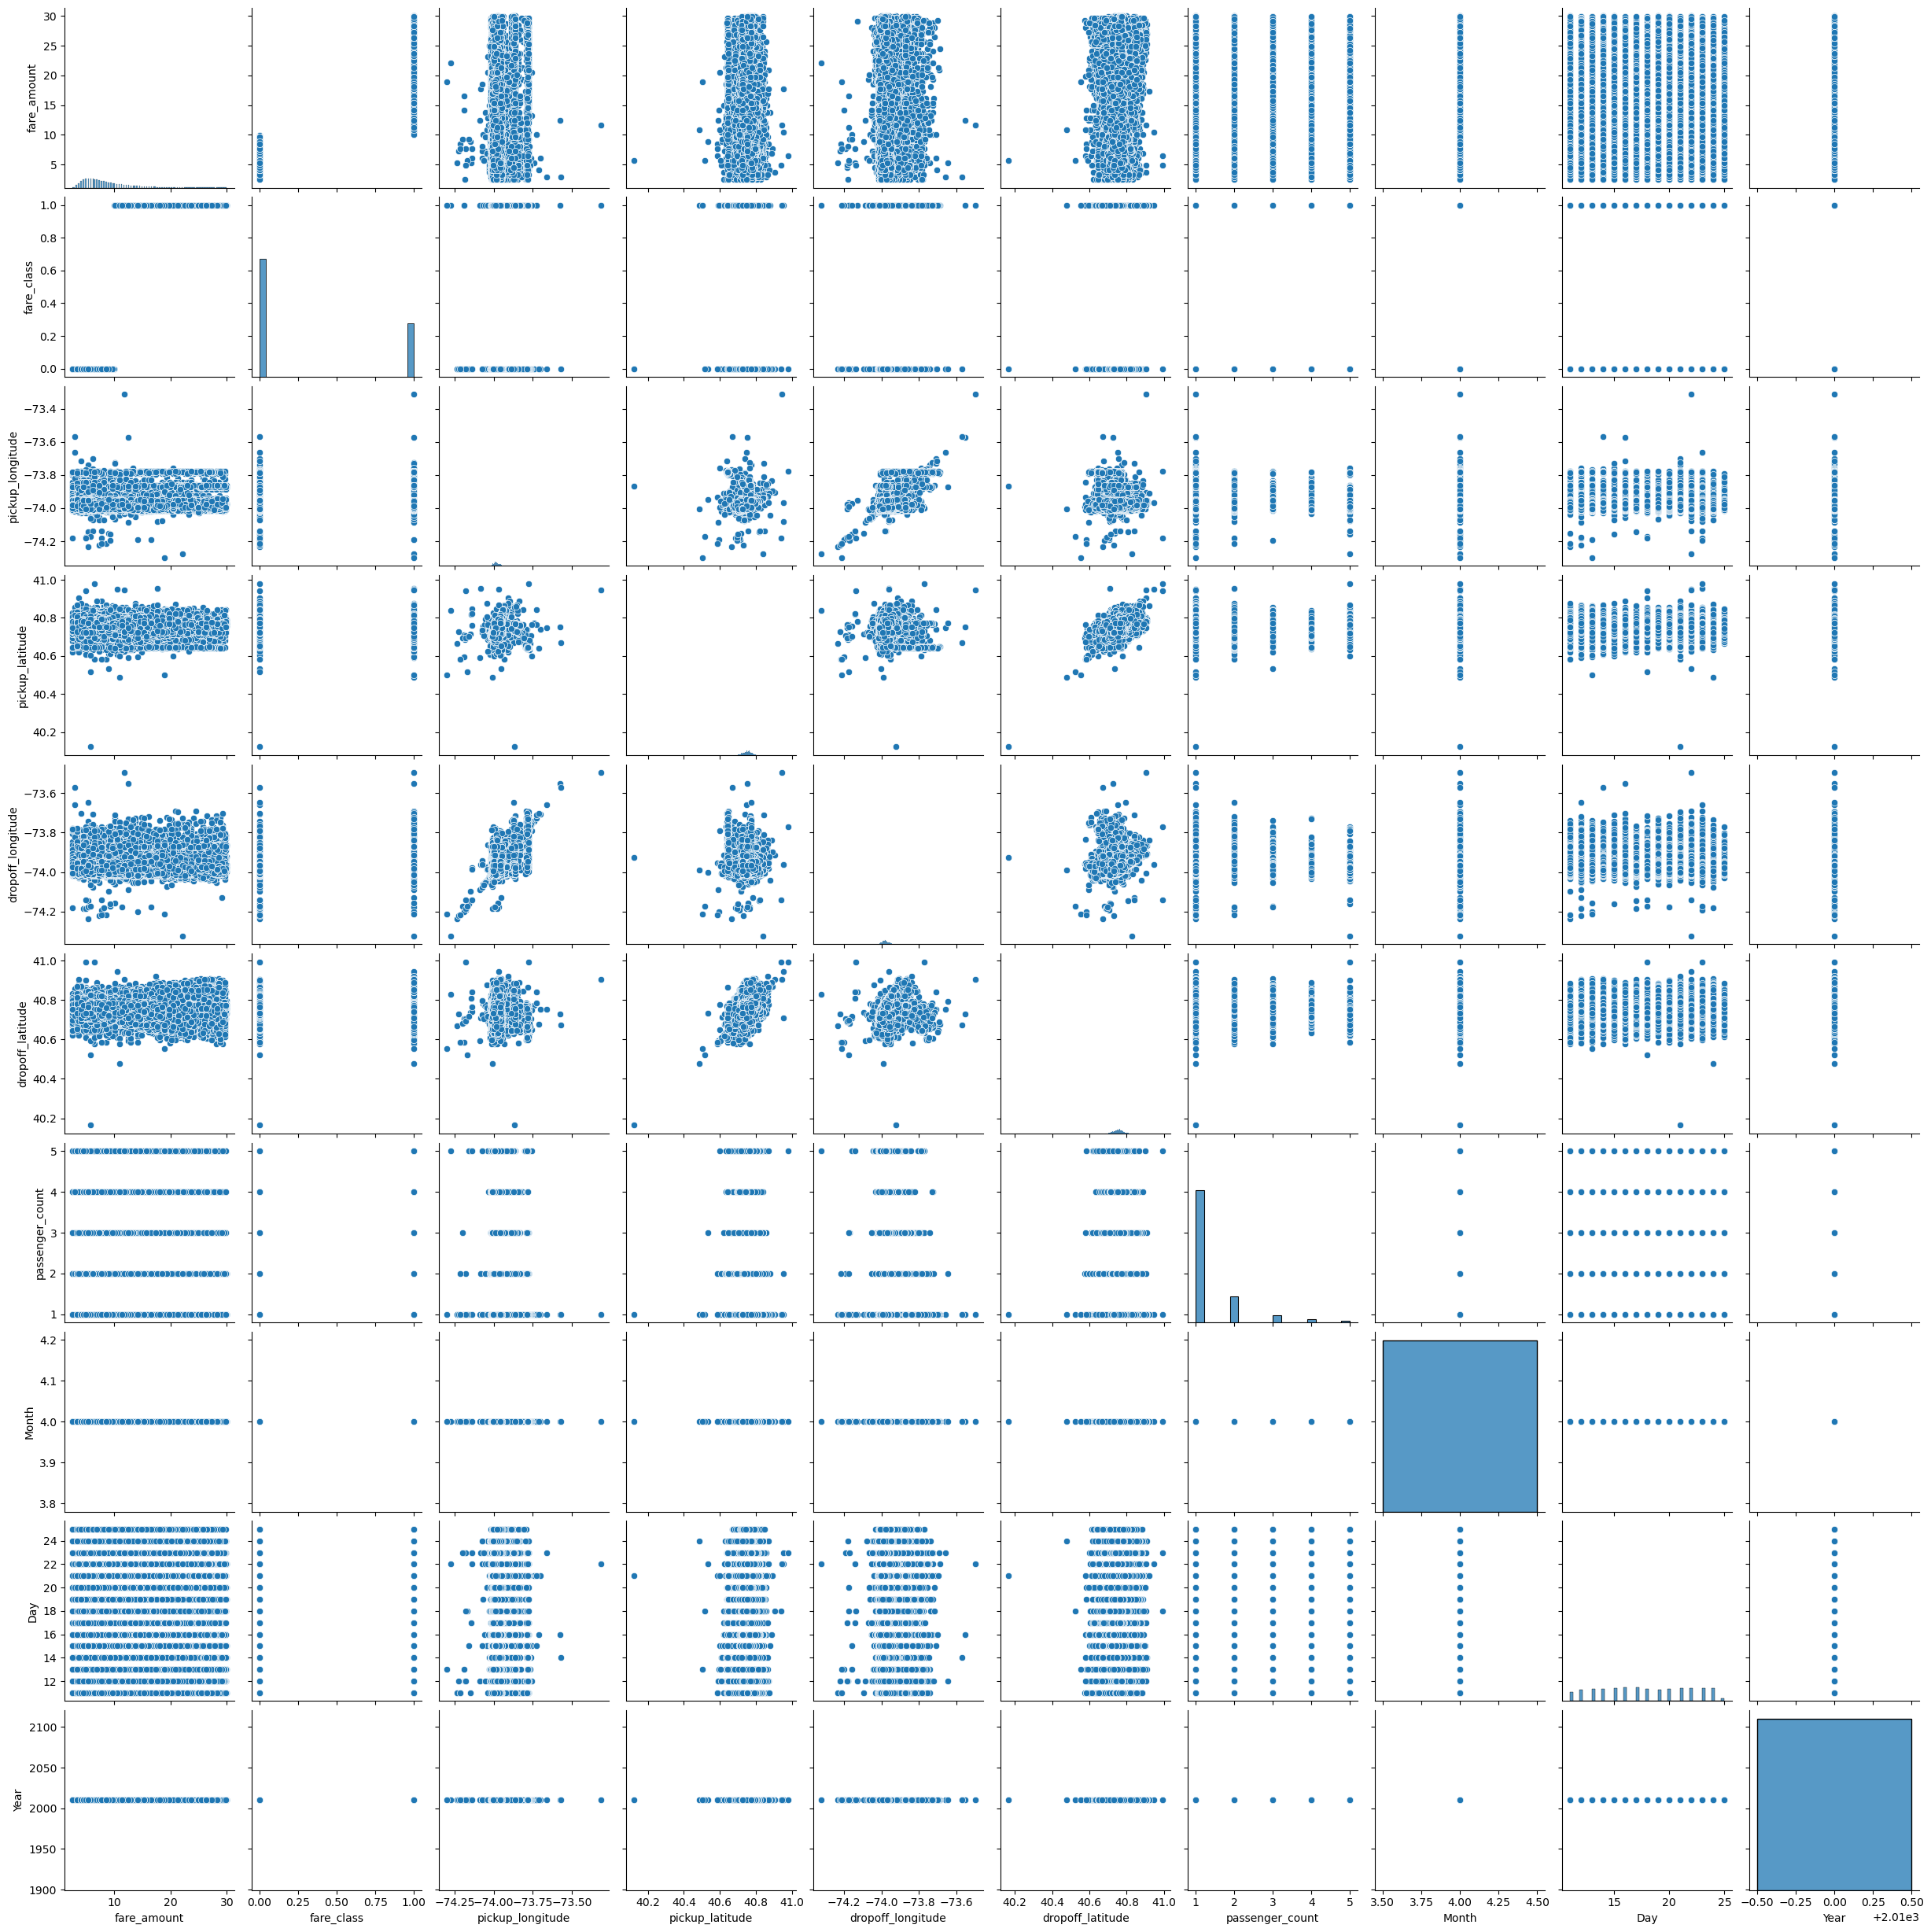

In [76]:
sns.pairplot(taxi)

In [19]:
taxi['Year'].unique()

array([2010], dtype=int64)

<AxesSubplot:xlabel='Hour', ylabel='fare_amount'>

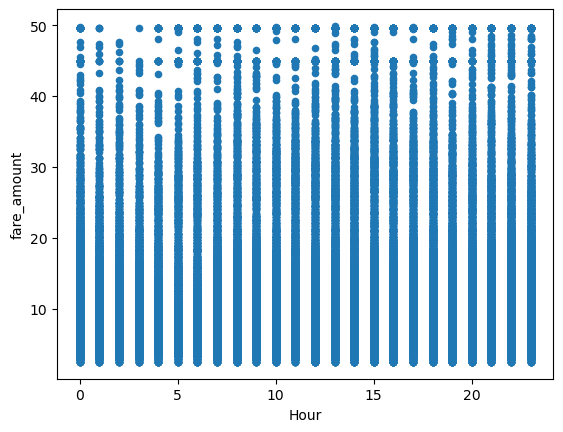

In [69]:
taxi.plot(kind='scatter',x='Hour',y='fare_amount')

<AxesSubplot:xlabel='fare_class', ylabel='fare_amount'>

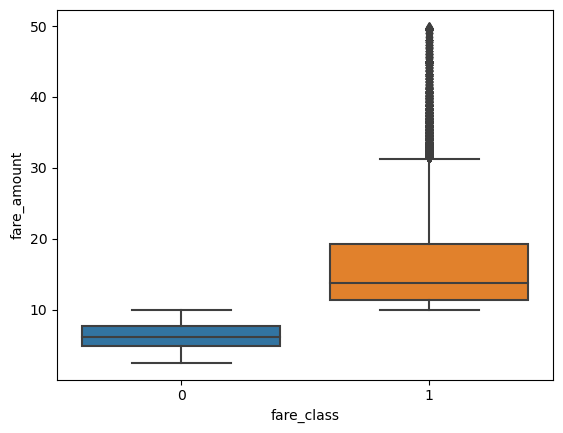

In [5]:
sns.boxplot(x='fare_class',y='fare_amount',data=taxi)

In [65]:
taxi['pickup_datetime'][taxi['fare_amount']>30].nunique()
taxi['pickup_datetime'][(taxi['passenger_count']>1) & (taxi['passenger_count']<4)].count()

23524

In [66]:
taxi.shape[0]

116124

In [56]:
for i in range (0,taxi.shape[0]):
    if taxi.loc[i,'fare_amount']>30:
        taxi.drop(i,inplace=True)

In [68]:
g=taxi.groupby(['fare_class'])


In [6]:
#Retails['Month']=pd.to_datetime(Retails['InvoiceDate']).dt.month
taxi['Month']=pd.to_datetime(taxi['pickup_datetime']).dt.month

In [7]:
taxi['Day']=pd.to_datetime(taxi['pickup_datetime']).dt.day

In [66]:
taxi['Hour']=pd.to_datetime(taxi['pickup_datetime']).dt.hour

In [8]:
taxi['Year']=pd.to_datetime(taxi['pickup_datetime']).dt.year

In [9]:
taxi['time']=pd.to_datetime(taxi['pickup_datetime']).dt.time

In [69]:
g.describe()

fare_amount                                                      \
                 count       mean       std   min   25%   50%   75%    max   
fare_class                                                                   
0              80000.0   6.380803  1.756314   2.5   4.9   6.1   7.7   9.91   
1              36124.0  14.921144  4.880795  10.0  11.3  13.3  16.9  30.00   

           pickup_longitude             ... Month           Day             \
                      count       mean  ...   75%  max    count       mean   
fare_class                              ...                                  
0                   80000.0 -73.980270  ...   4.0  4.0  80000.0  17.768988   
1                   36124.0 -73.975692  ...   4.0  4.0  36124.0  17.947708   

                                                    
                 std   min   25%   50%   75%   max  
fare_class                                          
0           4.005589  11.0  14.0  18.0  21.0  25.0  
1           4.046344  11.0  15.0  18.0  22.0  25.0  

[2 rows x 64 columns]

In [13]:
g.sum()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_class,,,,,,
0,510464.21,-5.918422e+06,3.260269e+06,-5.918365e+06,3.260309e+06,106398
1,694374.92,-2.958774e+06,1.629905e+06,-2.958575e+06,1.629894e+06,55262


In [60]:
taxi['pickup_latitude'].max()

40.981292

In [80]:
corr = taxi['fare_amount'].corr(taxi['Hour'])
#taxi[['fare_amount','Hour']].corr
print(corr)

-0.013644024069309653


In [70]:
taxi.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'Month', 'Day', 'Year', 'time', 'Hour'],
      dtype='object')

In [107]:
y=taxi['fare_amount']
x=taxi[['pickup_longitude','pickup_latitude', 
       'dropoff_longitude','dropoff_latitude','passenger_count','Hour']]

In [103]:
x=sm.add_constant(x)

In [108]:
x.shape

(120000, 6)

In [109]:
model=sm.OLS(y,x).fit()

In [110]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            fare_amount   R-squared (uncentered):                   0.645
Model:                            OLS   Adj. R-squared (uncentered):              0.645
Method:                 Least Squares   F-statistic:                          3.632e+04
Date:                Tue, 09 May 2023   Prob (F-statistic):                        0.00
Time:                        23:59:46   Log-Likelihood:                     -4.1154e+05
No. Observations:              120000   AIC:                                  8.231e+05
Df Residuals:                  119994   BIC:                                  8.232e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
pickup_longitude      2.1054      0.615      3.426      0.001       0.901       3.310
pickup_latitude      17.8127      0.858     20.761      0.000      16.131      19.494
dropoff_longitude     9.8204      0.596     16.484      0.000       8.653      10.988
dropoff_latitude      4.0756      0.745      5.470      0.000       2.615       5.536
passenger_count       0.3676      0.028     12.939      0.000       0.312       0.423
Hour                 -0.0168      0.003     -5.105      0.000      -0.023      -0.010
==============================================================================
Omnibus:                    69982.492   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           608201.289
Skew:                           2.754   Prob(JB):                         0.00
Kurtosis:                      12.555   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
vif=[variance_inflation_factor(x,i) for i in range(0,x.shape[1])]
vif
c=x.columns
c[0]

'pickup_longitude'

In [112]:
vif_df={}
for i in range(0,x.shape[1]):
    vif_df[c[i]]=vif[i]

In [113]:
vif_df   # very high value of vif suggest mullticollinnearity

{'pickup_longitude': 4446687.931495613,
 'pickup_latitude': 2630522.6758428593,
 'dropoff_longitude': 4178916.902584509,
 'dropoff_latitude': 1983324.6384753732,
 'passenger_count': 4.154478717414913,
 'Hour': 5.114481570182228}

In [120]:
#iteration 2
y1=taxi['fare_amount']
#x1=taxi[['pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','Hour']]

#iteration3- drop lat/long
x1=taxi[['pickup_latitude','passenger_count','Hour']]

In [121]:
model=sm.OLS(y1,x1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            fare_amount   R-squared (uncentered):                   0.642
Model:                            OLS   Adj. R-squared (uncentered):              0.642
Method:                 Least Squares   F-statistic:                          7.180e+04
Date:                Wed, 10 May 2023   Prob (F-statistic):                        0.00
Time:                        00:04:29   Log-Likelihood:                     -4.1200e+05
No. Observations:              120000   AIC:                                  8.240e+05
Df Residuals:                  119997   BIC:                                  8.240e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
pickup_latitude     0.2403      0.002    159.155      0.000       0.237       0.243
passenger_count     0.3417      0.029     11.988      0.000       0.286       0.398
Hour               -0.0162      0.003     -4.910      0.000      -0.023      -0.010
==============================================================================
Omnibus:                    70049.621   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           595803.191
Skew:                           2.768   Prob(JB):                         0.00
Kurtosis:                      12.408   Cond. No.                         56.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
vif=[variance_inflation_factor(x1,i) for i in range(0,x1.shape[1])]
vif
c=x1.columns
vif_df={}
for i in range(0,x1.shape[1]):
    vif_df[c[i]]=vif[i]
vif_df

{'pickup_latitude': 8.086785556421033,
 'passenger_count': 4.149721640475921,
 'Hour': 5.087844171545724}